<a href="https://colab.research.google.com/github/soeun1030/pythorch_README/blob/main/04_autograd.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 04. 자동미분

In [10]:
import torch

## 4-1. requires_grad

In [16]:
x = torch.ones(3, requires_grad=True)
print(x)
print(x.grad)
print(x.grad_fn)
print(x.requires_grad)

tensor([1., 1., 1.], requires_grad=True)
None
None
True


In [17]:
y = 2 * x
print(y)
print(y.grad)
print(y.grad_fn)
print(y.requires_grad)

tensor([2., 2., 2.], grad_fn=<MulBackward0>)
None
True


<ipython-input-17-9c3e4a13d414>:3: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at aten/src/ATen/core/TensorBody.h:489.)
  print(y.grad)


In [18]:
z = y ** 2
print(z)

tensor([4., 4., 4.], grad_fn=<PowBackward0>)


## 4-2. backward()
### x -> y -> z 계산에서 역전파를 통해 기울기를 구함

In [19]:
result = z.sum()
result.backward()

In [20]:
print(z)
print(x.grad)

tensor([4., 4., 4.], grad_fn=<PowBackward0>)
tensor([8., 8., 8.])


## 4-3. no_grad()
### 역전파를 중지

In [22]:
x = torch.tensor(1.0, requires_grad=True)
y = x ** 2
print(x.requires_grad)
print(y.requires_grad)

with torch.no_grad():
  y = x ** 2
  print(x.requires_grad)
  print(y.requires_grad)

True
True
True
False


## 4-4. detach()

In [23]:
y.detach()

tensor(1.)

# 실습1. 선형회귀 실습


Epoch [1 / 400], Loss: 293.2315
Epoch [2 / 400], Loss: 33.8315
Epoch [3 / 400], Loss: 8.0916
Epoch [4 / 400], Loss: 5.5264
Epoch [5 / 400], Loss: 5.2599
Epoch [6 / 400], Loss: 5.2215
Epoch [7 / 400], Loss: 5.2058
Epoch [8 / 400], Loss: 5.1925
Epoch [9 / 400], Loss: 5.1796
Epoch [10 / 400], Loss: 5.1668
Epoch [11 / 400], Loss: 5.1541
Epoch [12 / 400], Loss: 5.1415
Epoch [13 / 400], Loss: 5.1291
Epoch [14 / 400], Loss: 5.1168
Epoch [15 / 400], Loss: 5.1046
Epoch [16 / 400], Loss: 5.0926
Epoch [17 / 400], Loss: 5.0806
Epoch [18 / 400], Loss: 5.0688
Epoch [19 / 400], Loss: 5.0571
Epoch [20 / 400], Loss: 5.0455
Epoch [21 / 400], Loss: 5.0340
Epoch [22 / 400], Loss: 5.0227
Epoch [23 / 400], Loss: 5.0114
Epoch [24 / 400], Loss: 5.0003
Epoch [25 / 400], Loss: 4.9893
Epoch [26 / 400], Loss: 4.9784
Epoch [27 / 400], Loss: 4.9676
Epoch [28 / 400], Loss: 4.9569
Epoch [29 / 400], Loss: 4.9463
Epoch [30 / 400], Loss: 4.9358
Epoch [31 / 400], Loss: 4.9254
Epoch [32 / 400], Loss: 4.9151
Epoch [33 / 40

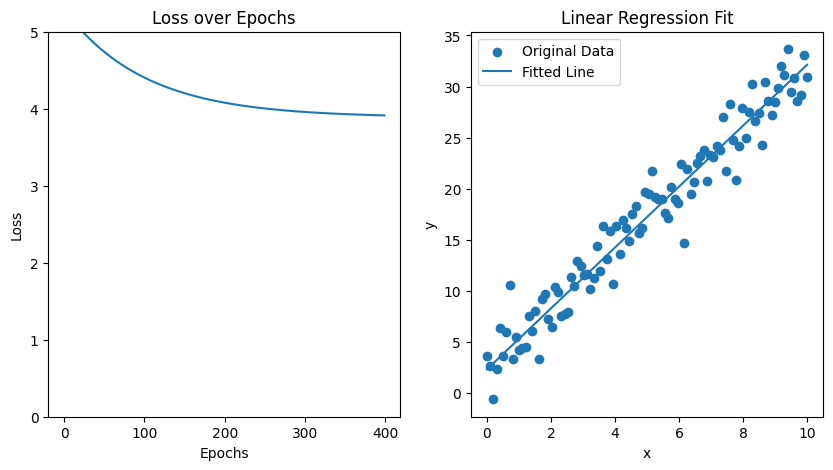

Model parameters
linear.weight : tensor([[2.9806]])
linear.bias : tensor([2.3249])


In [41]:
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

## 1. 입출력 정의
x = torch.linspace(0, 10, 100).view(-1, 1)  #입력 데이터
y = 3 * x + 2 + torch.randn(100, 1) * 2  #출력 데이터

## 2. 모델 정의
class LinearRegressionModel(nn.Module):
  def __init__(self):
    super(LinearRegressionModel, self).__init__()
    self.linear = nn.Linear(1, 1)  #입력1개 출력1개
  def forward(self, x):  #foward : 순전파
    return self.linear(x)

model = LinearRegressionModel()

## 3. 손실함수 정의 -> 손실함수 선택 : MSE, MAE ...
loss_function = nn.MSELoss()

## 4. 가중치 업데이트 -> 경사하강법 사용(어떤 것을 사용할지 선택)
# lr = Learning rate(러닝메이트)
optimizer = optim.SGD(model.parameters(), lr=0.01)  #SGD : 확률적 경사하강법

## 5. 학습 반복
epochs = 400
losses = []

for epoch in range(epochs):
  optimizer.zero_grad()  #기울기 초기화
  outputs = model(x)  #예측값 계산
  loss = loss_function(outputs, y)  #손실 계산
  loss.backward()  #역전파
  optimizer.step()  #가중치 업데이트

  losses.append(loss.item())  #손실값 저장

  if (epochs % 50 == 0):
    print(f'Epoch [{epoch + 1} / {epochs}], Loss: {loss.item():.4f}')

## 6. 결과 시각화
plt.figure(figsize=(10,5))

## 손실 감소 그래프
plt.subplot(1, 2, 1)
plt.plot(losses)
plt.ylim(0, 5)
plt.title("Loss over Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")

## 학습된 모델
plt.subplot(1, 2, 2)
plt.scatter(x.numpy(), y.numpy(), label="Original Data")
plt.plot(x.numpy(), model(x).detach().numpy(), label="Fitted Line")
plt.title("Linear Regression Fit")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()

plt.show()

## 최종 모델 파라미터 확인
print("Model parameters")
for name, param in model.named_parameters():
  if param.requires_grad:
    print(f"{name} : {param.data}")

